In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import (Model, CategoricalParameter, ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench import (Model, MultiprocessingEvaluator, SequentialEvaluator, Policy, Scenario, ema_logging)
from dike_model_function import DikeNetwork 

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

def sum_over(*args):
    return sum(args)

In [2]:
#geen idee; volgens mij niet nodig, maar stond in voorbeeld
uncertainties = dike_model.uncertainties
levers = dike_model.levers 
outcomes = dike_model.outcomes

In [3]:
#Run eigenlijk alleen voor model check
from ema_workbench import (perform_experiments)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with SequentialEvaluator(dike_model) as evaluator:
    results_random = evaluator.perform_experiments(scenarios=5, policies=5)
    
experiments, outcomes = results_random
print(outcomes.keys())

[MainProcess/INFO] performing 5 scenarios * 5 policies * 1 model(s) = 25 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 12 cases completed
[MainProcess/INFO] 14 cases completed
[MainProcess/INFO] 16 cases completed
[MainProcess/INFO] 18 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 22 cases completed
[MainProcess/INFO] 24 cases completed
[MainProcess/INFO] experiments finished


dict_keys(['A1/2_EAD', 'A1/2_END', 'A3_EAD', 'A3_END', 'G_TIC', 'EEC', 'TAC'])


In [17]:
#deze duurde 3,5 uur om te runnen bij Maarten; kan de results ook inladen via Excel
from ema_workbench.em_framework.evaluators import BaseEvaluator
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
convergence_metrics = [HyperVolume(minimum=[0,0,0,0,1e7,0,1e8], maximum=[1e8, 1,1e8,1,1e9,1e6,5e9]),
                       EpsilonProgress()]

with MultiprocessingEvaluator(dike_model) as evaluator:
    results1, convergence = evaluator.optimize(nfe=25000, searchover='levers', epsilons=[1e6,1e-2,1e6,1e-2,1e6,1e4,1e7], 
                                               convergence=convergence_metrics)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/25000 nfe
[MainProcess/INFO] generation 5: 500/25000 nfe
[MainProcess/INFO] generation 10: 997/25000 nfe
[MainProcess/INFO] generation 15: 1496/25000 nfe
[MainProcess/INFO] generation 20: 1994/25000 nfe
[MainProcess/INFO] generation 25: 2489/25000 nfe
[MainProcess/INFO] generation 30: 2987/25000 nfe
[MainProcess/INFO] generation 35: 3482/25000 nfe
[MainProcess/INFO] generation 40: 3979/25000 nfe
[MainProcess/INFO] generation 45: 4473/25000 nfe
[MainProcess/INFO] generation 50: 4965/25000 nfe
[MainProcess/INFO] generation 55: 5458/25000 nfe
[MainProcess/INFO] generation 60: 5952/25000 nfe
[MainProcess/INFO] generation 65: 6447/25000 nfe
[MainProcess/INFO] generation 70: 6938/25000 nfe
[MainProcess/INFO] generation 75: 7429/25000 nfe
[MainProcess/INFO] generation 80: 7922/25000 nfe
[MainProcess/INFO] generation 85: 8418/25000 nfe
[MainProcess/INFO] generation 90: 8903/25000 nfe
[MainProcess/INFO] generation 95: 9394/25000

In [18]:
#copy maken zodat de 3,5 uur run iig bewaard blijft 
results_copy = results1
convergence_copy = convergence

In [25]:
# results_copy.to_excel('./export/resultsoptimize25000_results.xlsx')
# convergence_copy.to_excel('./export/resultsoptimize25000_convergence.xlsx')

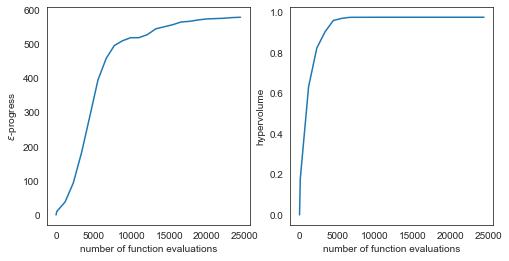

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

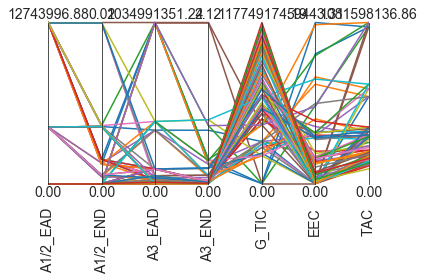

In [30]:
from ema_workbench.analysis import parcoords

data = results1.loc[:,['A1/2_EAD', 'A1/2_END', 'A3_EAD', 'A3_END', 'G_TIC', 'EEC', 'TAC']]
limits = parcoords.get_limits(data)
limits.loc[0, ['A1/2_EAD', 'A1/2_END', 'A3_EAD', 'A3_END', 'G_TIC', 'EEC', 'TAC']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [52]:
import statistics
result_statistics = pd.DataFrame()
result_statistics['mean']=(np.mean(results1))
result_statistics['std']=(np.std(results1))
result_statistics['min']=(np.min(results1))
result_statistics['max']=(np.max(results1))
result_statistics.to_excel('./export/resultsoptimize25000_statistics.xlsx')